In [1]:
!pip install duckdb


In [2]:
import duckdb
import matplotlib.pyplot as plt

# Connect to in-memory DuckDB
con = duckdb.connect()


In [3]:
# Customers
con.execute("""
CREATE TABLE customers AS
SELECT * FROM read_csv_auto('data set sql.csv')
""")



In [4]:
con.execute("""
SELECT COUNT(DISTINCT customer_id) AS total_customers
FROM customers
""").df()


,total_customers
0,99441


In [5]:
df_state = con.execute("""
SELECT customer_state, COUNT(*) AS customer_count
FROM customers
GROUP BY customer_state
ORDER BY customer_count DESC
""").df()

df_state





,customer_state,customer_count
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


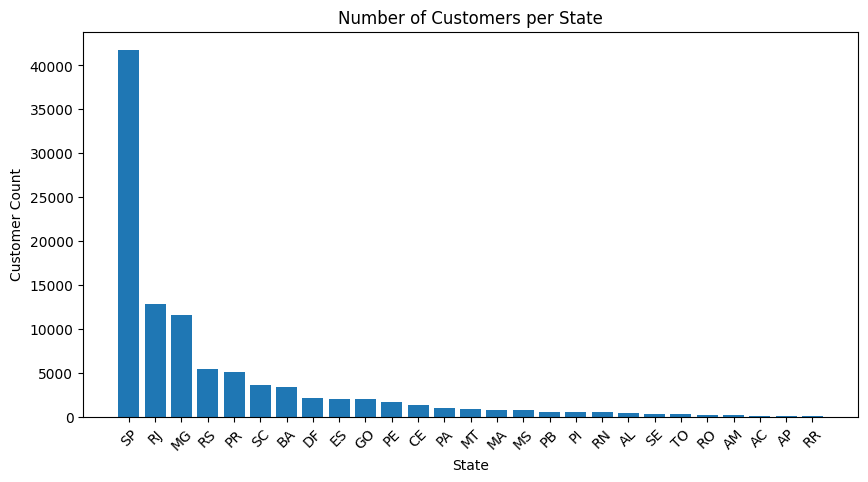

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(df_state['customer_state'], df_state['customer_count'])
plt.title('Number of Customers per State')
plt.xlabel('State')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)
plt.show()


In [7]:
df_city = con.execute("""
SELECT customer_city, COUNT(*) AS customer_count
FROM customers
GROUP BY customer_city
ORDER BY customer_count DESC
LIMIT 10
""").df()

df_city


,customer_city,customer_count
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


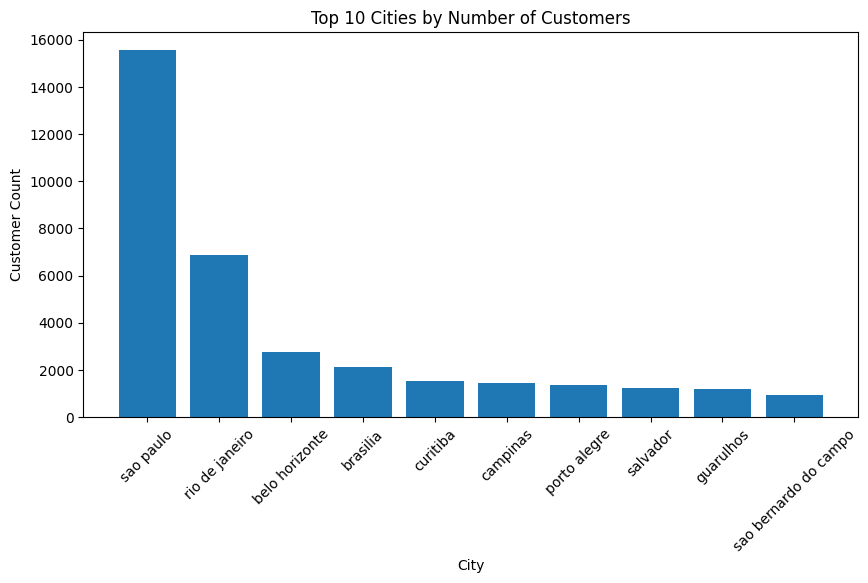

In [8]:
plt.figure(figsize=(10,5))
plt.bar(df_city['customer_city'], df_city['customer_count'])
plt.title('Top 10 Cities by Number of Customers')
plt.xlabel('City')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)
plt.show()


In [9]:
df_state_segment = con.execute("""
SELECT customer_state,
       COUNT(*) AS customer_count,
       CASE
           WHEN COUNT(*) > 20000 THEN 'High'
           WHEN COUNT(*) BETWEEN 10000 AND 20000 THEN 'Medium'
           ELSE 'Low'
       END AS state_segment
FROM customers
GROUP BY customer_state
ORDER BY customer_count DESC
""").df()

df_state_segment


,customer_state,customer_count,state_segment
0,SP,41746,High
1,RJ,12852,Medium
2,MG,11635,Medium
3,RS,5466,Low
4,PR,5045,Low
5,SC,3637,Low
6,BA,3380,Low
7,DF,2140,Low
8,ES,2033,Low
9,GO,2020,Low


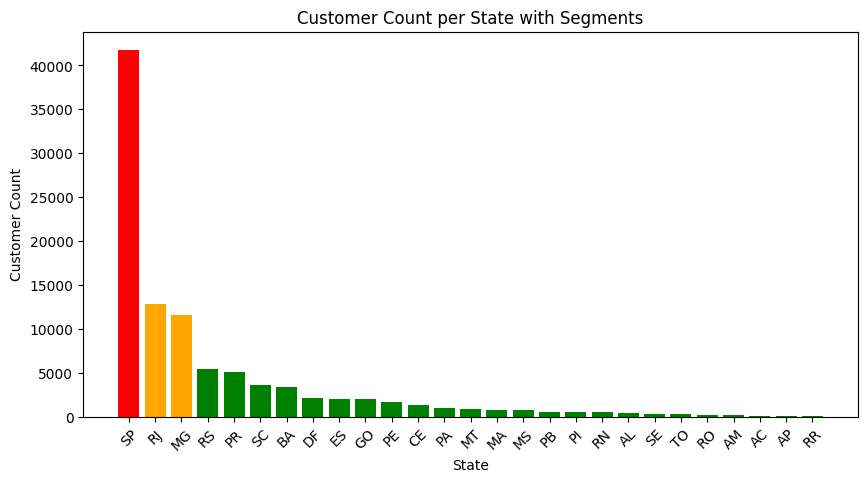

In [10]:
plt.figure(figsize=(10,5))
plt.bar(df_state_segment['customer_state'], df_state_segment['customer_count'],
        color=['red' if x=='High' else 'orange' if x=='Medium' else 'green' for x in df_state_segment['state_segment']])
plt.xticks(rotation=45)
plt.title('Customer Count per State with Segments')
plt.xlabel('State')
plt.ylabel('Customer Count')
plt.show()


In [ ]:
df_state_pct = con.execute("""
SELECT customer_state,
       ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM customers), 2) AS percentage
FROM customers
GROUP BY customer_state
ORDER BY percentage DESC
""").df()


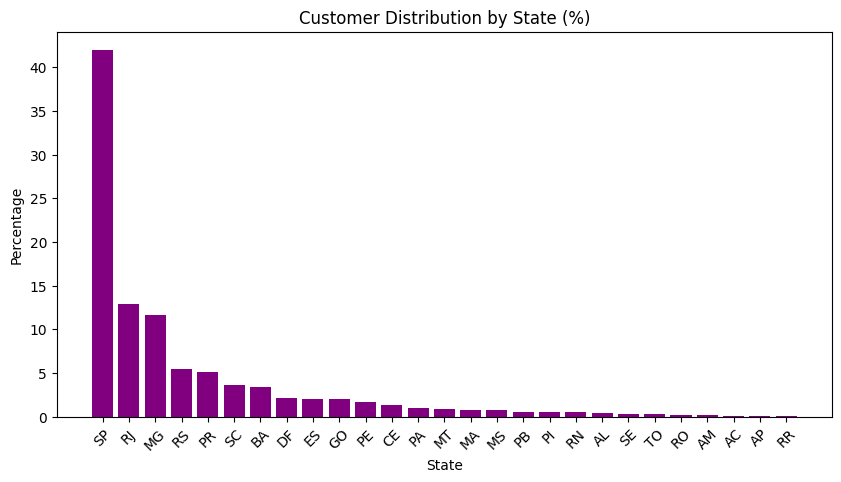

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(df_state_pct['customer_state'], df_state_pct['percentage'], color='purple')
plt.xticks(rotation=45)
plt.title('Customer Distribution by State (%)')
plt.xlabel('State')
plt.ylabel('Percentage')
plt.show()


In [ ]:
df_large_cities = con.execute("""
SELECT customer_city, COUNT(*) AS customer_count
FROM customers
GROUP BY customer_city
HAVING COUNT(*) > 500
ORDER BY customer_count DESC
""").df()
df_large_cities


,customer_city,customer_count
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938
